# Getting the Data

Libraries:

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Dataset path as global variables.

In [2]:
DATASET_PATH = '/home/alk/aau/datasets'

SVEBOLLE_PATH = os.path.join(DATASET_PATH, 'Svebolle')
SVEBOLLE_CSV = 'LORA_data.csv'

Creating method for data loading.

In [13]:
import requests
def get_data(url, path, force_download=False, separator=';'):
    """Download and cache the Svebolle data
    
    Parameters\n
    ----------\n
    path: string (optional)\n
        location to save the data\n
    url: string (optional)\n
        web location of the data\n
    force_download: bool (optional)\n
        if True, force redownloading of data\n
    Returns\n
    -------\n
    data: pandas.DataFrame\n
        the Svebolle deployment measurement dataset\n
    """
    if force_download or not os.path.exists(os.path.join(path, 'LORA_data.csv')):
        r = requests.get(url)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall(path)
    data = pd.read_csv(os.path.join(path, 'LORA_data.csv'), sep=separator)
    return data

Lets start with larger and cleaner data from Svebolle.

In [14]:
# this data set has semicolon separated values

data = get_data(url='https://www.dropbox.com/sh/yramhj65py4tsr6/AABhfGJGIagJYpCuxtVzWj_Ua?dl=1',
                      path='~')

NameError: name 'zipfile' is not defined

# Quick Overview of Svebolle Dataset

First few rows of data:

In [5]:
data.head(7)

,Time,DevAddr,Freq,Chan,BW,SPF,RSSI,SNR,4/5,dataRate,crcStatus,mType,macPayload,_id
0,2017-01-02 12:08:27.788000,000013c1,868100000,0,125,7,-120,-1.0,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,c1130000804605039977d43d70b12724eea946c5a41f42...,586a34acb5866106ea976eb5
1,2017-01-02 12:08:29.196000,000013b8,868500000,2,125,7,-58,6.5,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,b813000000142b0352619fc9a89e0e561d060ca3ac29e5...,586a34aeb5866106ea976eb6
2,2017-01-02 12:08:44.520000,000013bf,868300000,1,125,7,"-118,8",-1.8,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,bf13000080ba30042ea26888992702442c832fc2c8ac91...,586a34bdb5866106ea976eb7
3,2017-01-02 12:08:55.347000,000013bf,868500000,2,125,7,-115,1.8,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,bf13000080bb30030a96702f4ebe2cfe8559765a622344...,586a34c8b5866106ea976eb8
4,2017-01-02 12:08:55.346000,000013bf,868500000,2,125,7,-115,1.8,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,bf13000080bb30030a96702f4ebe2cfe8559765a622344...,586a34c8b5866106ea976eb9
5,2017-01-02 12:09:00.488000,000013b7,868100000,0,125,7,-83,8.5,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,b713000000fcef0317b8cde19fb3eb57a0dc0bd81ea08b...,586a34cdb5866106ea976eba
6,2017-01-02 12:09:04.840000,000013b7,868500000,2,125,7,-82,6.8,4/5,"{u'modulation': u'LORA', u'bandwidth': 125, u'...",1,Confirmed Data Up,b713000000fdef04b780640b021db9b2f8c9d137c85367...,586a34d1b5866106ea976ebb


Check the basic information for every column of data DataFrame.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689396 entries, 0 to 689395
Data columns (total 14 columns):
Time          689396 non-null object
DevAddr       689276 non-null object
Freq          689396 non-null int64
Chan          689396 non-null int64
BW            689396 non-null int64
SPF           689396 non-null int64
RSSI          689396 non-null object
SNR           689396 non-null float64
 4/5          689396 non-null object
dataRate      689396 non-null object
crcStatus     689396 non-null int64
mType         689396 non-null object
macPayload    689396 non-null object
_id           689396 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 73.6+ MB


Quick analysis of columns in DataFrame.

* *Time* - basic datetime format to microsecond precision (might want to treat this data as time series)
* *DevAddr* - device address written as HEX string (easily can be converted to binary if needed)
* *Freq* - radio frequancy of signals that carry information
* *Chan* - channel
* *BW* - bandwidth
* *SPF* - spreading factor
* *RSSI* - received signal strength indication, type object because of usage of colon insted of dot for float
* *SNR* - signal-to-noise ratio
* *4/5* - coding rate
* *dataRate* - JSON formatted info, not relevant; maybe insert actual data rate value
* *crcStatus* - is there an error in transmission
* *mType* - type of MAC message
* *macPayload* - part of transmitted data that is the actual intended message
* *_id* - identification of package

## Numerical Data

Basic stats of numerical data series in Svebolle dataset.

In [7]:
data.describe()

,Freq,Chan,BW,SPF,SNR,crcStatus
count,6.893960e+05,689396.000000,689396.000000,689396.000000,689396.000000,689396.0
mean,8.680077e+08,2.373771,125.006527,7.284694,2.936245,1.0
std,4.607855e+05,2.293109,0.903266,1.144044,5.841973,0.0
min,8.671000e+08,0.000000,125.000000,7.000000,-31.800000,1.0
25%,8.677000e+08,1.000000,125.000000,7.000000,-1.000000,1.0
50%,8.681000e+08,2.000000,125.000000,7.000000,3.200000,1.0
75%,8.683000e+08,4.000000,125.000000,7.000000,8.000000,1.0
max,9.011858e+08,196.000000,250.000000,12.000000,31.200000,1.0


Lets visualize to enable better data exploration.

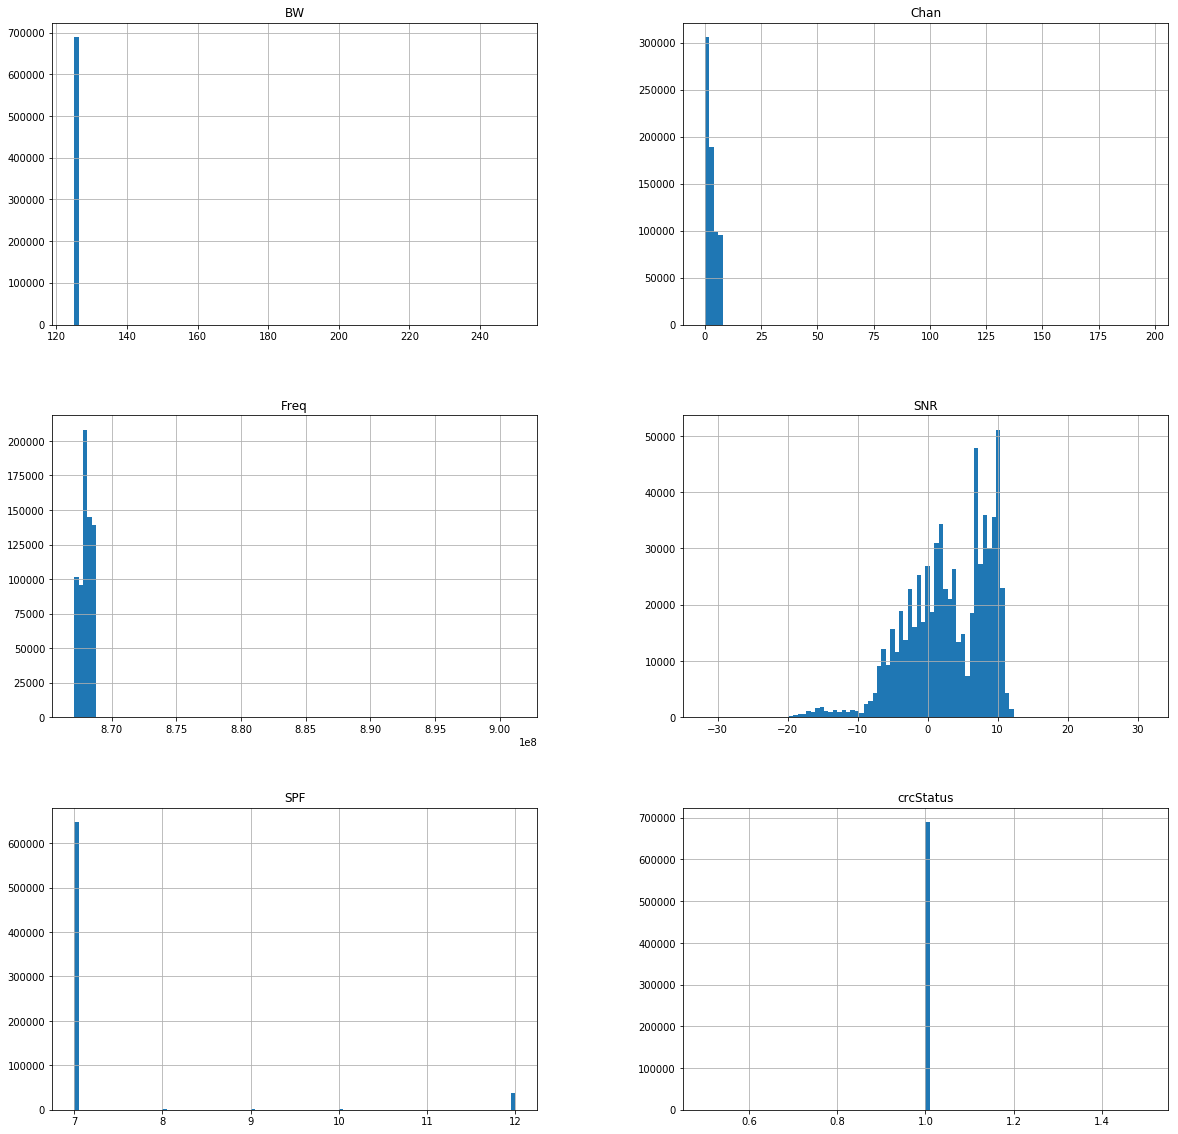

In [8]:
data.hist(bins=100, figsize=(20, 20))
plt.show()

Even though RSSI is numerical value (float64) because the comma was used (insted of dot) for dividing decimal part of number, it is represented like object type in DataFrame.

Lets take care of that and rerun visualization.

In [9]:
data['RSSI'].head()

0      -120
1       -58
2    -118,8
3      -115
4      -115
Name: RSSI, dtype: object

In [10]:
# replacing every comma for dot
data['RSSI'] = [x.replace(',', '.') for x in data['RSSI']]

In [11]:
data['RSSI'].head()

0      -120
1       -58
2    -118.8
3      -115
4      -115
Name: RSSI, dtype: object

In [12]:
# converting object type into the float64 type.
# by providing errors='coerce' every invalid data point or missing data point will be written as NaN
data['RSSI'] = pd.to_numeric(data.RSSI, errors='coerce') 

In [13]:
data['RSSI'].head()

0   -120.0
1    -58.0
2   -118.8
3   -115.0
4   -115.0
Name: RSSI, dtype: float64

In [14]:
data.describe()

,Freq,Chan,BW,SPF,RSSI,SNR,crcStatus
count,6.893960e+05,689396.000000,689396.000000,689396.000000,689396.000000,689396.000000,689396.0
mean,8.680077e+08,2.373771,125.006527,7.284694,-101.294723,2.936245,1.0
std,4.607855e+05,2.293109,0.903266,1.144044,22.335990,5.841973,0.0
min,8.671000e+08,0.000000,125.000000,7.000000,-193.200000,-31.800000,1.0
25%,8.677000e+08,1.000000,125.000000,7.000000,-118.000000,-1.000000,1.0
50%,8.681000e+08,2.000000,125.000000,7.000000,-112.500000,3.200000,1.0
75%,8.683000e+08,4.000000,125.000000,7.000000,-81.000000,8.000000,1.0
max,9.011858e+08,196.000000,250.000000,12.000000,120.000000,31.200000,1.0


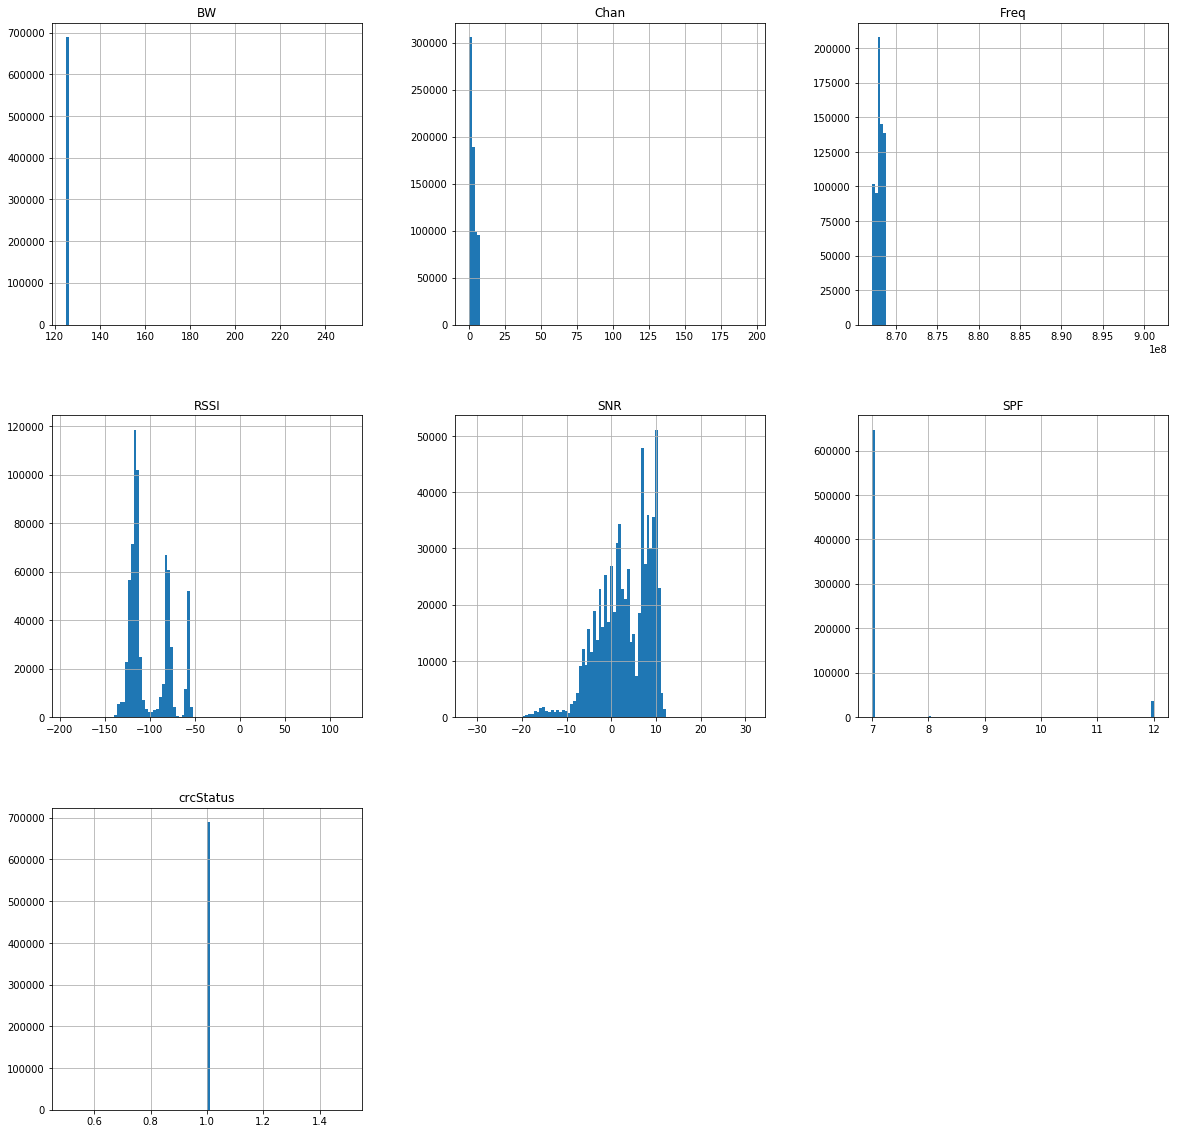

In [15]:
data.hist(bins=100, figsize=(20, 20))
plt.show()

Great! Now, there are only two plot worth of deeper exploration - RSSI and SNR.

The rest of the plots such as BW, Chan, Freq... have only a few values. Lets see all unique values of those series:

In [16]:
print('BW unique data points:', data['BW'].unique())
print('\nChan unique data points:', data['Chan'].unique())
print('\nFreq unique data points:', data['Freq'].unique())
print('\nSPF unique data points:', data['SPF'].unique())
print('\ncrcStatus unique data points:', data['crcStatus'].unique())

BW unique data points: [125 250]

Chan unique data points: [  0   2   1   8   5   4   7   6   3  12 196]

Freq unique data points: [868100000 868500000 868300000 867500000 867300000 867900000 867700000
 867100000 901185761]

SPF unique data points: [ 7 12  8  9 11 10]

crcStatus unique data points: [1]


## Non-numerical data

In [17]:
non_numeric_list = data.select_dtypes(include='object')
print(non_numeric_list.columns.values)

['Time' 'DevAddr' ' 4/5' 'dataRate' 'mType' 'macPayload' '_id']


Lets start with random value in **Time** series.

In [18]:
from random import randint

_ = data['Time'].iloc[randint(0, len(data.Time))]
pd.to_datetime(_, errors='coerce') # if there's an error, parsing will raise an exception

Timestamp('2017-03-21 10:53:12.417000')

It is well formated Datetime series with precision up to microseconds.

Now, **DevAddr** should be, as [TTN says](https://www.thethingsnetwork.org/docs/lorawan/address-space.html), "...*32 bit device address of which 7 bits are fixed (...), leaving 25 bits that can be assigned to individual devices, a procedure called Activation.*"

In this dataset is written in HEX format.

In [19]:
hex_DevAddr_dp = data.DevAddr.iloc[randint(0,689396)]
hex_DevAddr_dp

'000013bf'

Converting it to binary:

In [20]:
scale = 16 # hex scaler
num_of_bits = 32 # due to The Things Network
bin(int(hex_DevAddr_dp, scale))[2:].zfill(num_of_bits)

'00000000000000000001001110111111'

Next, there is a single column labeled as **4/5**.

In [21]:
data[' 4/5'].head()

0     4/5
1     4/5
2     4/5
3     4/5
4     4/5
Name:  4/5, dtype: object

...and there is basically nothing besides ' '4/5 in the whole column:

In [22]:
print(' 4/5 unique data points:', data[' 4/5'].unique())

 4/5 unique data points: [' 4/5']


It actually represents coding rate which means for every 4 bit of actual information there is 1 redundant bit.

**dataRate** seems to be JSON formatted text:

In [23]:
data['dataRate'].head()

0    {u'modulation': u'LORA', u'bandwidth': 125, u'...
1    {u'modulation': u'LORA', u'bandwidth': 125, u'...
2    {u'modulation': u'LORA', u'bandwidth': 125, u'...
3    {u'modulation': u'LORA', u'bandwidth': 125, u'...
4    {u'modulation': u'LORA', u'bandwidth': 125, u'...
Name: dataRate, dtype: object

This just formats already written in data, it should be replaced for an actual Data Rate value.

$ DR = SF \times \frac{BW}{2^{SF}} \times CR $

where:
* DR is Data Rate
* SF is Spreading Factor
* BW is BandWidth
* CR is Code Rate

**mType** is type of message being transmitted (or received).

In [24]:
data['mType'].head()

0    Confirmed Data Up
1    Confirmed Data Up
2    Confirmed Data Up
3    Confirmed Data Up
4    Confirmed Data Up
Name: mType, dtype: object

There are a few different categories of message type:

In [25]:
print('mType unique data points:', data['mType'].unique())

mType unique data points: ['Confirmed Data Up' 'Proprietary' 'RFU' 'Confirmed Data Down'
 'Join Request' 'Unconfirmed Data Down' 'Unconfirmed Data Up'
 'Join Accept']


**macPayload** is encoded message device is transmitting to Network Server.

In [26]:
data['macPayload'].head()

0    c1130000804605039977d43d70b12724eea946c5a41f42...
1    b813000000142b0352619fc9a89e0e561d060ca3ac29e5...
2    bf13000080ba30042ea26888992702442c832fc2c8ac91...
3    bf13000080bb30030a96702f4ebe2cfe8559765a622344...
4    bf13000080bb30030a96702f4ebe2cfe8559765a622344...
Name: macPayload, dtype: object

Lastly, **_id** is an identification of message being transmitted.

In [27]:
data['_id'].head()

0    586a34acb5866106ea976eb5
1    586a34aeb5866106ea976eb6
2    586a34bdb5866106ea976eb7
3    586a34c8b5866106ea976eb8
4    586a34c8b5866106ea976eb9
Name: _id, dtype: object

## RSSI and SNR deeper lookin to statistical properties

### Histogram

Histogram is an accurate representation of the distribution of numerical data, it estimates the probability distribution of quantitative variable. First thing important is to 'bin' the range of values.

In [28]:
n_RSSI_data = len(data.RSSI)
n_SNR_data = len(data.SNR)

if(n_RSSI_data == n_SNR_data):
    n_data = n_RSSI_data

n_bins = int(np.sqrt(n_data)) # square root choice

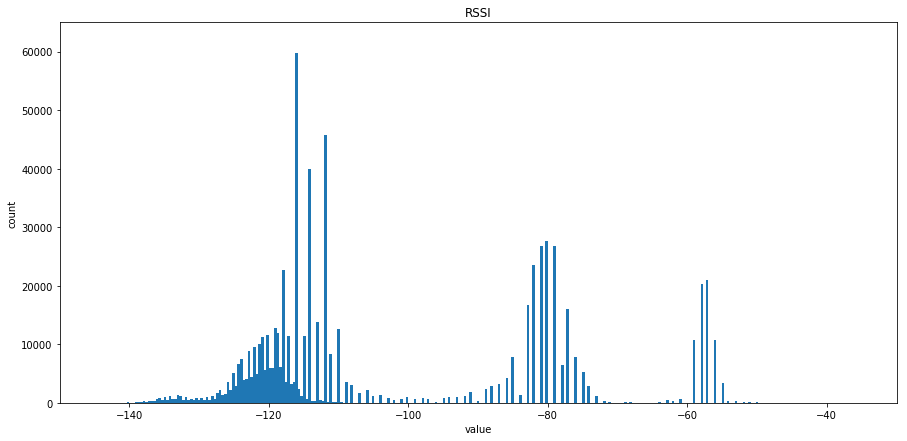

In [29]:
# RSSI plot

plt.figure(figsize=(15,7))
plt.axis([-150, -30, 0, 65000])
plt.hist(data.RSSI, bins=n_bins)
plt.title('RSSI')
plt.xlabel('value')
plt.ylabel('count')
plt.show()

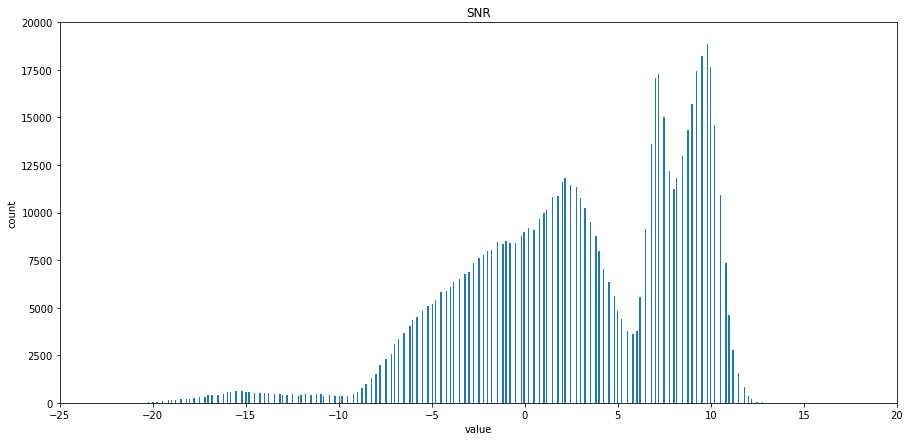

In [30]:
# SNR plot

plt.figure(figsize=(15,7))
plt.axis([-25, 20, 0, 20000])
plt.hist(data.SNR, bins=n_bins)
plt.title('SNR')
plt.xlabel('value')
plt.ylabel('count')
plt.show()

### ECDF

An Empirical Cumulative Distribution Function gives complete picture of how data is distributed.

In [31]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    
    # step function that jumps up by 1/n at each of the n data points
    y = np.arange(1, n+1) / n
    
    return x, y

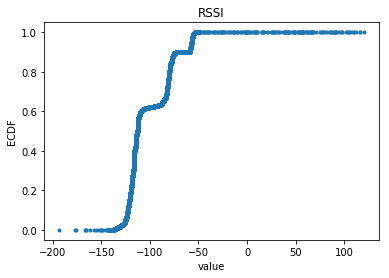

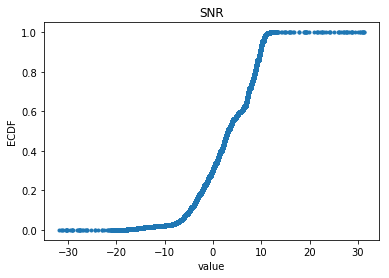

In [32]:
x_RSSI, y_RSSI = ecdf(data.RSSI)
x_SNR, y_SNR = ecdf(data.SNR)

# RSSI cdf
plt.plot(x_RSSI, y_RSSI, marker='.', linestyle='none')
plt.title('RSSI')
plt.xlabel('value')
plt.ylabel('ECDF')
plt.show()

# SNR cdf
plt.plot(x_SNR, y_SNR, marker='.', linestyle='none')
plt.title('SNR')
plt.xlabel('value')
plt.ylabel('ECDF')
plt.show()

Percentiles (and median on the CDF plots) is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations falls. Graphical visualization of percentiles:

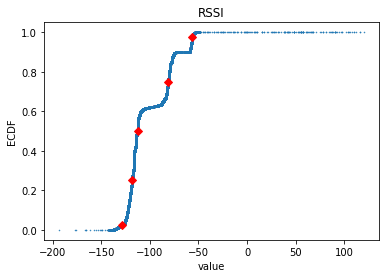

RSSI percentiles values: [-128.2 -118.  -112.5  -81.   -57. ]


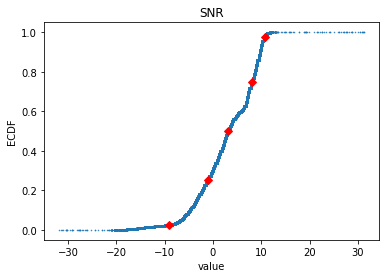

SNR percentiles values: [-9.  -1.   3.2  8.  10.8]


In [33]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])

ptiles_RSSI = np.percentile(data.RSSI, percentiles)
ptiles_SNR = np.percentile(data.SNR, percentiles)

# RSSI cdf w/ percentiles marked as red diamonds
plt.plot(x_RSSI, y_RSSI, marker='.', markersize=1,
         linestyle='none')
plt.title('RSSI')
plt.xlabel('value')
plt.ylabel('ECDF')

plt.plot(ptiles_RSSI, percentiles/100, marker='D', color='red',
        linestyle='none')

plt.show()
print('RSSI percentiles values:', ptiles_RSSI)


# SNR cdf w/ percentiles marked as red diamonds
plt.plot(x_SNR, y_SNR, marker='.', markersize=1,
         linestyle='none')
plt.title('SNR')
plt.xlabel('value')
plt.ylabel('ECDF')

plt.plot(ptiles_SNR, percentiles/100, marker='D', color='red',
        linestyle='none')

plt.show()
print('SNR percentiles values:', ptiles_SNR)

### Statistical Inference 

Statistical inference is the process of deducing properties of an underlying probability distribution. It is mostly usead to draw:
1. probabilistic conclusions about what we might expect if we collected the same data again,
2. acceptable conclusions from data;
3. more general conclusions from relatively few data of observations.

Comparing measured data of RSSI and SNNR to well-known statistical distributions:

Are the RSSI and SNR **normally** distributed?

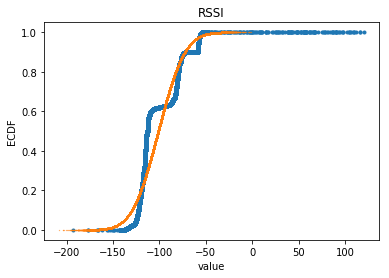

RSSI mean: -101.29472349709803
RSSI std: 22.335973704021928


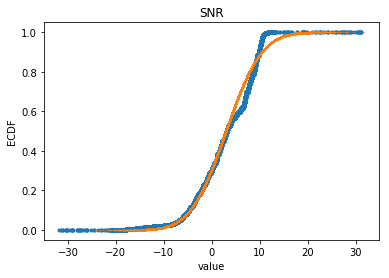

SNR mean: 2.936244770784778
SNR std: 5.841968658273899


In [34]:
# calculating mean and std
mu_RSSI = np.mean(data.RSSI)
sigma_RSSI = np.std(data.RSSI)

mu_SNR = np.mean(data.SNR)
sigma_SNR = np.std(data.SNR)

# series length
if(n_RSSI_data == n_SNR_data):
    n_data = n_RSSI_data

#####################
# RSSI distribution #
#####################
# sampling out of a normal distribution
samples = np.random.normal(mu_RSSI, sigma_RSSI, n_data)
x_normal, y_normal = ecdf(samples)

# visually comparing
# actual data
plt.plot(x_RSSI, y_RSSI, marker='.', linestyle='none')
plt.title('RSSI')
plt.xlabel('value')
plt.ylabel('ECDF')

# theoretical data
plt.plot(x_normal, y_normal, marker='.', markersize=0.5, linestyle='none')
plt.show()
print('RSSI mean:', mu_RSSI)
print('RSSI std:', sigma_RSSI)

#####################
# SNR distribution #
#####################
# sampling out of a normal distribution
samples = np.random.normal(mu_SNR, sigma_SNR, n_data)
x_normal, y_normal = ecdf(samples)

# visually comparing
# actual data
plt.plot(x_SNR, y_SNR, marker='.', linestyle='none')
plt.title('SNR')
plt.xlabel('value')
plt.ylabel('ECDF')

# theoretical data
plt.plot(x_normal, y_normal, marker='.', markersize=0.5, linestyle='none')
plt.show()
print('SNR mean:', mu_SNR)
print('SNR std:', sigma_SNR)

It is fairly that SNR is Normally distributed (there are some pretty big devieations at around SNR = 12, though).

RSSI have large deviations from Normal distribution. Good idea would be go through **confirmatory data analysis**. This process is also called hypothesis testing. This test should be all about comparing (not only visually, but statistically) two datasets: 
* measured RSSI values
* theoretical Gauss values generated from mean and standard deviation of measured RSSI

A hypothesis is proposed for the statistical relationship between the two datasets and this is compared as an alternative to an idealized *null hypothesis* that proposes no relationship between two datasets. The comparison is deemed *statistically significant* if the relationship between the data sets would be an unlikely realization of the null hypothesis according to a threshold probability - the significance level.

It can be pretty hard to determine the significance level of the null hypothesis with techniques such as ECDF. Simulation of the hypothesis is required. 

Good way of simulating the hypothesis is generating a permutation sample:

In [35]:
def permutation_sample(data1, data2):
    """Generating a permutation sample from two datasets"""
    # concatenating the datasets
    data = np.concatenate((data1, data2))
    
    # permutating the concatenated dataset
    permuted_data = np.random.permutation(data)
    
    # splitting permuted array into two
    perm_sample1 = permuted_data[:len(data1)]
    perm_sample2 = permuted_data[len(data1):]
    
    return perm_sample1, perm_sample2

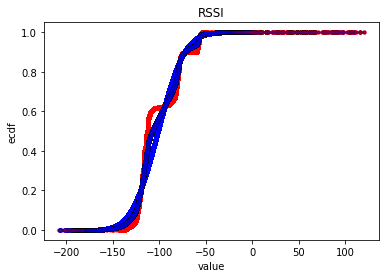

<Figure size 1080x504 with 0 Axes>

In [36]:
mu_RSSI = np.mean(data.RSSI)
sigma_RSSI = np.std(data.RSSI)

normal_RSSI = np.random.normal(mu_RSSI, sigma_RSSI, n_data)
x_normal, y_normal = ecdf(normal_RSSI)

# plotting ECDFs from original data
plt.plot(x_RSSI, y_RSSI, marker='.', linestyle='none', color='red')
plt.plot(x_normal, y_normal, marker='.', linestyle='none', color='blue')
plt.title('RSSI')
plt.xlabel('value')
plt.ylabel('ecdf')

for _ in range(50):
    # generating permutation samples
    ps1, ps2 = permutation_sample(data.RSSI, normal_RSSI)
    
    # computing ECDFs
    x_1, y_1 = ecdf(ps1)
    x_2, y_2 = ecdf(ps2)
    
    # plotting ECDFs of permutation sample
    plt.plot(x_1, y_1, marker='.', linestyle='none',  color='red', alpha=0.02)
    plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)
    
plt.figure(figsize=(15,7))
plt.show()

<hr>
H0 - RSSI distribution is not Normally distributed.
<hr>

Using **test statistics** it is possible to quantify the assesment of how reasonable the observed data is assuming a hypothesis is true. The value of test statistic computed from a permutation sample is called a permutation replicate. 

Using repetative permutation replicate, creating PDF out of all sampled data we can determine p-value which represents part of the PDF graph on the right of the actual difference of the means (of the two tested datasets).

**p-value** is the probability of obtaining a value of test statistic that is at least as extreme as what was observed, under the assumpiton the null hypothesis is true (it is NOT the probability that the null hypothesis is true).

Small p-value indicates that the data is statistically significantly different than what we would observe under the null hypothesis.

In [37]:
def draw_permutation_replicates(data1, data2, func, size=1):
    """generating multiple permuattion replicates"""
    # initialization of an array of replicates
    perm_replicates = np.empty(size)
    
    for i in range(size):
        # generate permutation sample
        ps1, ps2 = permutation_sample(data1, data2)
        
        # computing the test statistics
        perm_replicates[i] = func(ps1, ps2)
        
    return perm_replicates

In [38]:
def diff_of_means(data1, data2):
    """difference in means of two arrays"""
    return np.mean(data1) - np.mean(data2)

In [39]:
# computing difference of mean between RSSI measures and theoretical RSSI distribution sample
mu_RSSI = np.mean(data.RSSI)
sigma_RSSI = np.std(data.RSSI)

normal_RSSI = np.random.normal(mu_RSSI, sigma_RSSI, n_data)

empirical_diff_means = diff_of_means(data.RSSI, normal_RSSI)

# drawing 10.000 permutation replicates
perm_replicates = draw_permutation_replicates(data.RSSI, normal_RSSI, diff_of_means, size=100)

# computing the p-value
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
p

0.2

p-value turns out to be extremely large - the H0 (null hypothesis) should be rejected, which means that this distribution probably is not Gaussian! Let's create q'q plot.

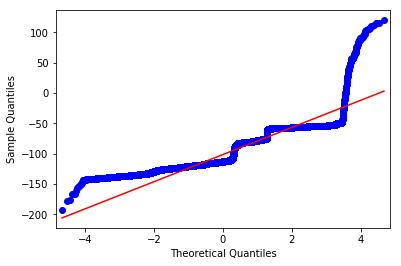

In [40]:
from statsmodels.graphics.gofplots import qqplot

qqplot_data = qqplot(data.RSSI, line='s').gca().lines



Lets do **D'Agostino's $K^{2}$ test** to confirm this.

Now, D'Agostino is giving null hypothesis as: Sample is Gaussian.

In [41]:
from scipy.stats import normaltest

stat, p = normaltest(data.RSSI)

alpha = 0.05
if (p > alpha):
    msg = 'Fail to reject H0, samle probably is Gaussian'
else:
    msg = 'Reject H0, sample probably is not Gaussian'

print('Length of the sample data: {};\
        \nTest Statistic: {};\
        \np-value: {};\
        \nmessage: {}.'.format(n_data, stat, p, msg))

Length of the sample data: 689396;        
Test Statistic: 56874.61349510632;        
p-value: 0.0;        
message: Reject H0, sample probably is not Gaussian.


To conclude, even SNR distribution can be interpreted as Gaussian, for RSSI can be said, with great statistical significance, that is not Normally distributed.